In [255]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

# Retriving Dataset

## JHU Dataset

In [256]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

In [257]:
df_confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584


## US State Level data

In [258]:
US_State = pd.DataFrame()
for month in range(1,4):
    for day in range(1,31):
        month = str(month).zfill(2)
        day = str(day).zfill(2)
        try:
            US_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + month + '-' + day +'-2020.csv'
            df_bin = pd.read_csv(US_url)
            df_bin['Date'] = '2020-'+month+'-'+day
            US_State = pd.concat([US_State, df_bin], ignore_index = True)
        except:
            continue

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [259]:
US_State_copy = US_State.copy()

In [260]:
US_State[(US_State['Country/Region'] == 'China') | (US_State['Country_Region'] == 'China') \
             |(US_State['Country/Region'] == 'Mainland China') | (US_State['Country_Region'] == 'Mainland China')].head(3)


,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Date,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,2020-01-22,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN,NaN


In [261]:
US_State_copy = US_State_copy[(US_State_copy['Country/Region'] == 'US') | (US_State_copy['Country_Region'] == 'US')]
US_State_copy = US_State_copy.reset_index(drop = True)
China_Province_copy = US_State[(US_State['Country/Region'] == 'China') | (US_State['Country_Region'] == 'China') \
             |(US_State['Country/Region'] == 'Mainland China') | (US_State['Country_Region'] == 'Mainland China')]

China_Province_copy = China_Province_copy.reset_index(drop = True)


# Data Cleaning

In [262]:
US_State_copy = US_State_copy.drop(['Active','Admin2','Combined_Key','FIPS'],1)
China_Province_copy = China_Province_copy.drop(['Active','Admin2','Combined_Key','FIPS'],1)

## Time

In [263]:
# Function for stripping column Last Update
def strip_specific_time_1(date_column):
    for date in range(len(date_column)):
        if type(date_column[date]) == str:
            if len(date_column[date]) == 19:
                dt = str(date_column[date]).split('T')[0]
                date_column[date] = dt
            elif str(date_column[date]).split(' ')[0].split('/')[2] == '2020':
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
            else:
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'20-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
        else:
            continue 

In [264]:
# Function for stripping column Last_Update
def strip_specific_time_2(date_column):
    for date in range(len(date_column)):
        if type(date_column[date]) == str:
            try: 
                dt = datetime.strptime(str(date_column[date]), '%Y-%m-%d %H:%M:%S')
                date_column[date] = str(dt.year)+'-'+str(dt.month).zfill(2)+'-'+str(dt.day).zfill(2)
            except:
                dt = str(date_column[date]).split(' ')[0].split('/')
                date_column[date] = str(dt[2])+'20-'+str(dt[0].zfill(2))+'-'+str(dt[1].zfill(2))
        else:
            continue

In [265]:
# Function for combining two columns
def combine_two_columns(df,column1,column2):
    for row_index in range(len(df[column1])):
        if pd.Series(df[column1][row_index]).isnull()[0]:
            df[column1][row_index] = df[column2][row_index]
    df.drop(column2, axis = 1, inplace = True)
    return df

In [266]:
# Combine the Date Columns
strip_specific_time_2(US_State_copy['Last_Update'])
strip_specific_time_1(US_State_copy['Last Update'])
US_State_copy = combine_two_columns(US_State_copy,"Last_Update","Last Update")

strip_specific_time_2(China_Province_copy['Last_Update'])
strip_specific_time_1(China_Province_copy['Last Update'])
China_Province_copy = combine_two_columns(China_Province_copy,"Last_Update","Last Update")



/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de

In [267]:
US_State_copy = US_State_copy[US_State_copy['Last_Update'].isnull() == False]
US_State_copy = US_State_copy.reset_index(drop = True)

China_Province_copy = China_Province_copy[China_Province_copy['Last_Update'].isnull() == False]
China_Province_copy = China_Province_copy.reset_index(drop = True)


## Country/Region, Province/State, Latitude, Longitude

In [268]:
US_State_copy = combine_two_columns(US_State_copy,"Country_Region","Country/Region")

China_Province_copy = combine_two_columns(China_Province_copy,"Country_Region","Country/Region")



/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [269]:
# The rest nulls are data for one country, so don't have province/state
US_State_copy[US_State_copy['Province_State'].isnull()]

,Confirmed,Country_Region,Date,Deaths,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,1.0,US,2020-01-22,NaN,2020-01-22,NaN,NaN,NaN,NaN,Washington,NaN,NaN
1,1.0,US,2020-01-23,NaN,2020-01-23,NaN,NaN,NaN,NaN,Washington,NaN,NaN
2,1.0,US,2020-01-24,NaN,2020-01-24,NaN,NaN,NaN,NaN,Washington,NaN,NaN
3,1.0,US,2020-01-24,NaN,2020-01-24,NaN,NaN,NaN,NaN,Chicago,NaN,NaN
4,1.0,US,2020-01-25,NaN,2020-01-25,NaN,NaN,NaN,NaN,Washington,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,15.0,US,2020-03-21,0.0,2020-03-21,NaN,13.4443,NaN,144.7937,Guam,NaN,0.0
1552,14.0,US,2020-03-21,1.0,2020-03-20,NaN,44.2998,NaN,-99.4388,South Dakota,NaN,0.0
1553,8.0,US,2020-03-21,0.0,2020-03-21,NaN,38.4912,NaN,-80.9545,West Virginia,NaN,0.0
1554,6.0,US,2020-03-21,0.0,2020-03-21,NaN,18.3358,NaN,-64.8963,United States Virgin Islands,NaN,0.0


In [270]:
def combine_same_columns(col1, col2):
    for i in range(len(col1)):
        if type(col1[i]) == str:
            col2[i] = col1[i]

In [271]:
combine_same_columns(US_State_copy['Province/State'],US_State_copy['Province_State'])
combine_same_columns(US_State_copy['Lat'],US_State_copy['Latitude'])
combine_same_columns(US_State_copy['Long_'],US_State_copy['Longitude'])

combine_same_columns(China_Province_copy['Province/State'],China_Province_copy['Province_State'])
combine_same_columns(China_Province_copy['Lat'],China_Province_copy['Latitude'])
combine_same_columns(China_Province_copy['Long_'],China_Province_copy['Longitude'])

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [272]:
# Since we don't need Latitude and Longitude in this analysis, we directly delete these two columns
US_State_copy = US_State_copy.drop(['Province/State','Lat','Long_','Latitude','Longitude'], 1)

China_Province_copy = China_Province_copy.drop(['Province/State','Lat','Long_','Latitude','Longitude'], 1)


In [273]:
US_State_copy = US_State_copy[US_State_copy['Country_Region'].isnull() == False]

China_Province_copy = China_Province_copy[China_Province_copy['Country_Region'].isnull() == False]


In [274]:
# Now all Nan we have is for Deaths and recovered, so we can fill using 0
US_State_copy = US_State_copy.fillna(0)
China_Province_copy = China_Province_copy.fillna(0)

In [275]:
US_State_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30169 entries, 0 to 30168
Data columns (total 7 columns):
Confirmed         30169 non-null float64
Country_Region    30169 non-null object
Date              30169 non-null object
Deaths            30169 non-null float64
Last_Update       30169 non-null object
Province_State    30169 non-null object
Recovered         30169 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.8+ MB


In [276]:
China_Province_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2145
Data columns (total 7 columns):
Confirmed         2146 non-null float64
Country_Region    2146 non-null object
Date              2146 non-null object
Deaths            2146 non-null float64
Last_Update       2146 non-null object
Province_State    2146 non-null object
Recovered         2146 non-null float64
dtypes: float64(3), object(4)
memory usage: 134.1+ KB


In [277]:
US_State_copy.head(3)

,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
0,1.0,US,2020-01-22,0.0,2020-01-22,Washington,0.0
1,1.0,US,2020-01-23,0.0,2020-01-23,Washington,0.0
2,1.0,US,2020-01-24,0.0,2020-01-24,Washington,0.0


In [278]:
# Extract the confirmed, deaths and recovered cases
dates = df_confirmed.columns.values.tolist()[4:]
df_confirmed = pd.melt(df_confirmed, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_deaths = pd.melt(df_deaths, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)
df_recovered = pd.melt(df_recovered, id_vars=['Province/State','Country/Region','Lat','Long'], value_vars= dates)


In [279]:
# Rename the Columns
df_confirmed = df_confirmed.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Confirmed'})
df_deaths = df_deaths.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Deaths'})
df_recovered = df_recovered.rename(columns={'Country/Region':'Country_Region','Province/State':'Province_State','variable': 'Date','value':'Recovered'})


In [280]:
# Get the information for US
df_US_confirmed = df_confirmed[df_confirmed["Country_Region"] == "US"].iloc[:,-2:]
df_US_deaths = df_deaths[df_deaths["Country_Region"] == "US"].iloc[:,-2:]
df_US_recovered = df_recovered[df_recovered["Country_Region"] == "US"].iloc[:,-2:]

# State_Province-level Analysis

In [281]:
# Get data for Hubei Province
Hubei = China_Province_copy[China_Province_copy["Province_State"] == "Hubei"]
Hubei.head(10)

,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
12,444.0,Mainland China,2020-01-22,17.0,2020-01-22,Hubei,28.0
43,444.0,Mainland China,2020-01-23,17.0,2020-01-23,Hubei,28.0
62,549.0,Mainland China,2020-01-24,24.0,2020-01-24,Hubei,31.0
92,761.0,Mainland China,2020-01-25,40.0,2020-01-25,Hubei,32.0
122,1058.0,Mainland China,2020-01-26,52.0,2020-01-26,Hubei,42.0
152,1423.0,Mainland China,2020-01-27,76.0,2020-01-27,Hubei,45.0
182,3554.0,Mainland China,2020-01-28,125.0,2020-01-28,Hubei,80.0
212,3554.0,Mainland China,2020-01-29,125.0,2020-01-29,Hubei,88.0
242,4903.0,Mainland China,2020-01-30,162.0,2020-01-30,Hubei,90.0
273,7153.0,Mainland China,2020-02-01,249.0,2020-02-01,Hubei,168.0


In [282]:
# Get data for NY State
US_State_copy[(US_State_copy["Date"] == "2020-03-11")&((US_State_copy["Province_State"]=="New York")| (US_State_copy["Province_State"].str.endswith("NY")))]


,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
948,220.0,US,2020-03-11,0.0,2020-03-11,New York,0.0


In [283]:
US_State_sum = US_State_copy.groupby(["Date","Province_State"]).sum()
US_State_sum = US_State_sum.reset_index()

In [284]:
US_State_copy[((US_State_copy["Province_State"]=="New York")| (US_State_copy["Province_State"].str.endswith("NY")))]


,Confirmed,Country_Region,Date,Deaths,Last_Update,Province_State,Recovered
406,1.0,US,2020-03-02,0.0,2020-03-02,"New York City, NY",0.0
439,1.0,US,2020-03-03,0.0,2020-03-02,"New York City, NY",0.0
448,1.0,US,2020-03-03,0.0,2020-03-03,"Westchester County, NY",0.0
455,10.0,US,2020-03-04,0.0,2020-03-04,"Westchester County, NY",0.0
477,1.0,US,2020-03-04,0.0,2020-03-02,"New York City, NY",0.0
...,...,...,...,...,...,...,...
29986,9.0,US,2020-03-30,0.0,2020-03-30,New York,0.0
30016,15.0,US,2020-03-30,0.0,2020-03-30,New York,0.0
30041,9326.0,US,2020-03-30,10.0,2020-03-30,New York,0.0
30129,8.0,US,2020-03-30,1.0,2020-03-30,New York,0.0


In [285]:
US_NY = US_State_copy[((US_State_copy["Province_State"]=="New York")| (US_State_copy["Province_State"].str.endswith("NY")))]
US_NY.drop('Last_Update',axis=1,  inplace = True)
US_NY.drop_duplicates(inplace = True)


/Users/lush/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [286]:
US_NY_sum = US_NY.groupby("Date").sum().sort_values("Date").reset_index()

In [287]:
# Add the number of new cases for each day
US_NY_sum.loc[:,"Confirmed_new"] = US_NY_sum.loc[:,"Confirmed"].diff()
US_NY_sum.loc[:,"Deaths_new"] = US_NY_sum.loc[:,"Deaths"].diff()
US_NY_sum.loc[:,"Recovered_new"] = US_NY_sum.loc[:,"Recovered"].diff()

# Add the Incremental ratio for new cases for each day
US_NY_sum.loc[:,"Confirmed_Incremental_Rate"] = US_NY_sum.loc[:,"Confirmed"].diff()/US_NY_sum.loc[:,"Confirmed"]
US_NY_sum.loc[:,"Deaths_Incremental_Rate"] = US_NY_sum.loc[:,"Deaths"].diff()/US_NY_sum.loc[:,"Deaths"]
US_NY_sum.loc[:,"Recovered_Incremental_Rate"] = US_NY_sum.loc[:,"Recovered"].diff()/US_NY_sum.loc[:,"Recovered"]

In [288]:
Hubei.drop(["Country_Region","Last_Update"], axis=1,inplace = True)
# Add the number of new cases for each day
Hubei.loc[:,"Confirmed_new"] = Hubei.loc[:,"Confirmed"].diff()
Hubei.loc[:,"Deaths_new"] = Hubei.loc[:,"Deaths"].diff()
Hubei.loc[:,"Recovered_new"] = Hubei.loc[:,"Recovered"].diff()

# Add the Incremental ratio for new cases for each day
Hubei.loc[:,"Confirmed_Incremental_Rate"] = Hubei.loc[:,"Confirmed"].diff()/Hubei.loc[:,"Confirmed"]
Hubei.loc[:,"Deaths_Incremental_Rate"] = Hubei.loc[:,"Deaths"].diff()/Hubei.loc[:,"Deaths"]
Hubei.loc[:,"Recovered_Incremental_Rate"] = Hubei.loc[:,"Recovered"].diff()/Hubei.loc[:,"Recovered"]

/Users/lush/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lush/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [296]:
Hubei = Hubei.reset_index().drop("index",axis=1)

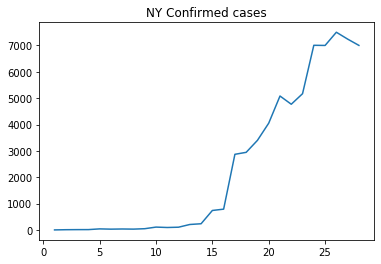

In [304]:
plt.title("NY New Confirmed cases")
plt.plot(US_NY_sum["Confirmed_new"])


In [313]:
Hubei[Hubei["Date"]=="2020-02-11"]

,Confirmed,Date,Deaths,Province_State,Recovered,Confirmed_new,Deaths_new,Recovered_new,Confirmed_Incremental_Rate,Deaths_Incremental_Rate,Recovered_Incremental_Rate
19,33366.0,2020-02-11,1068.0,Hubei,2639.0,1638.0,94.0,417.0,0.049092,0.088015,0.158014


Text(0.5, 1.0, 'Hubei Confirmed Cases')

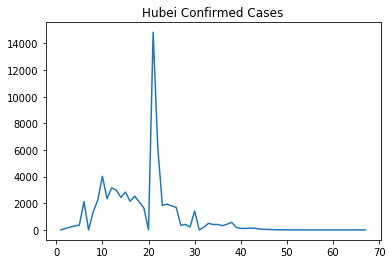

In [303]:
plt.plot(Hubei["New Confirmed_new"])
plt.title("Hubei Confirmed Cases")

In [301]:
Hubei

,Confirmed,Date,Deaths,Province_State,Recovered,Confirmed_new,Deaths_new,Recovered_new,Confirmed_Incremental_Rate,Deaths_Incremental_Rate,Recovered_Incremental_Rate
0,444.0,2020-01-22,17.0,Hubei,28.0,NaN,NaN,NaN,NaN,NaN,NaN
1,444.0,2020-01-23,17.0,Hubei,28.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,549.0,2020-01-24,24.0,Hubei,31.0,105.0,7.0,3.0,0.191257,0.291667,0.096774
3,761.0,2020-01-25,40.0,Hubei,32.0,212.0,16.0,1.0,0.278581,0.400000,0.031250
4,1058.0,2020-01-26,52.0,Hubei,42.0,297.0,12.0,10.0,0.280718,0.230769,0.238095
...,...,...,...,...,...,...,...,...,...,...,...
63,67801.0,2020-03-26,3169.0,Hubei,61201.0,0.0,6.0,390.0,0.000000,0.001893,0.006372
64,67801.0,2020-03-27,3174.0,Hubei,61732.0,0.0,5.0,531.0,0.000000,0.001575,0.008602
65,67801.0,2020-03-28,3177.0,Hubei,62098.0,0.0,3.0,366.0,0.000000,0.000944,0.005894
66,67801.0,2020-03-29,3182.0,Hubei,62570.0,0.0,5.0,472.0,0.000000,0.001571,0.007544
